<a href="https://colab.research.google.com/github/roymalini/Quant-Wing-2020/blob/master/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [29]:
#importing MSFT OHLCV values
import pandas_datareader.data as pdr
import datetime as dt
start_date = dt.date.today() - dt.timedelta(150)
end_date = dt.date.today()
tickers  = ['MSFT']
ohlcv = pdr.get_data_yahoo(tickers[0],start_date,end_date)
df = ohlcv.copy()


In [30]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-20,178.750000,174.990005,176.630005,175.059998,36669600.0,174.573792
2020-04-21,173.669998,166.110001,173.500000,167.820007,56203700.0,167.353912
2020-04-22,174.000000,170.820007,171.389999,173.520004,34651600.0,173.038086
2020-04-23,175.059998,170.910004,174.110001,171.419998,32790800.0,170.943909
2020-04-24,174.559998,170.710007,172.059998,174.550003,34305300.0,174.065216
...,...,...,...,...,...,...
2020-08-11,207.649994,203.139999,207.160004,203.380005,36446500.0,203.380005
2020-08-12,210.279999,204.750000,205.289993,209.190002,28041400.0,209.190002
2020-08-13,211.350006,208.149994,209.440002,208.699997,22588900.0,208.699997


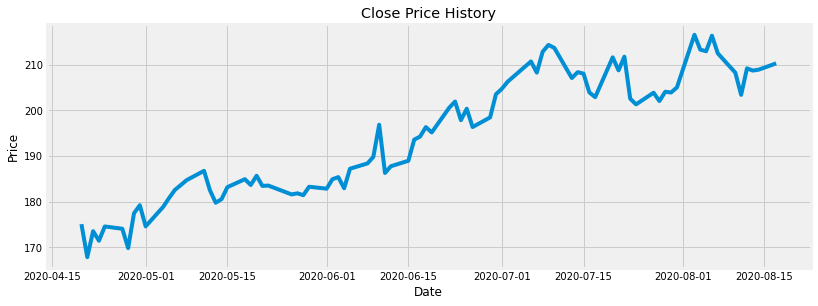

In [31]:
#plotting close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'],label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [32]:
#macd
shortema=df.Close.ewm(span=12 ,adjust=False).mean()
longema=df.Close.ewm(span=26 ,adjust=False).mean()
macd=shortema-longema
signal=macd.ewm(span=9 ,adjust=False).mean()


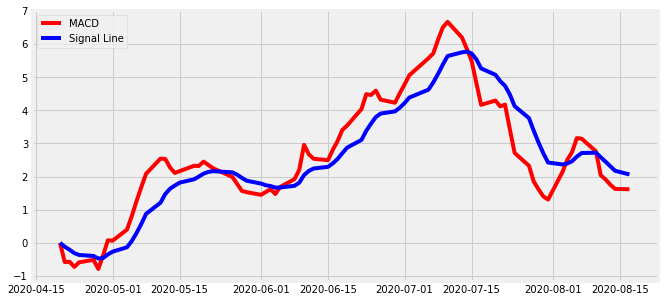

In [33]:
#plotting macd and macd signal line
plt.figure(figsize=(10, 5))
plt.plot(df.index,macd,label='MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color='blue')
plt.legend(loc='upper left')
plt.show()

In [34]:
df['MACD']=macd
df['Signal Line']=signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2020-04-20,178.750000,174.990005,176.630005,175.059998,36669600.0,174.573792,0.000000,0.000000
2020-04-21,173.669998,166.110001,173.500000,167.820007,56203700.0,167.353912,-0.577549,-0.115510
2020-04-22,174.000000,170.820007,171.389999,173.520004,34651600.0,173.038086,-0.568762,-0.206160
2020-04-23,175.059998,170.910004,174.110001,171.419998,32790800.0,170.943909,-0.722919,-0.309512
2020-04-24,174.559998,170.710007,172.059998,174.550003,34305300.0,174.065216,-0.585771,-0.364764
...,...,...,...,...,...,...,...,...
2020-08-11,207.649994,203.139999,207.160004,203.380005,36446500.0,203.380005,2.039199,2.584142
2020-08-12,210.279999,204.750000,205.289993,209.190002,28041400.0,209.190002,1.914526,2.450219
2020-08-13,211.350006,208.149994,209.440002,208.699997,22588900.0,208.699997,1.755942,2.311363


In [35]:
#creating trading strategy 

#buy if signal line crosses macd 
df['buy'] = [1 if df.loc[ei, 'Signal Line'] > df.loc[ei, 'MACD'] else 0 for ei in df.index]

#sell if macd  crosses signal line
df['sell'] = [1 if df.loc[ei, 'Signal Line'] < df.loc[ei, 'MACD'] else 0 for ei in df.index]


In [36]:
#display final df
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,buy,sell
Date,,,,,,,,,,
2020-04-20,178.750000,174.990005,176.630005,175.059998,36669600.0,174.573792,0.000000,0.000000,0,0
2020-04-21,173.669998,166.110001,173.500000,167.820007,56203700.0,167.353912,-0.577549,-0.115510,1,0
2020-04-22,174.000000,170.820007,171.389999,173.520004,34651600.0,173.038086,-0.568762,-0.206160,1,0
2020-04-23,175.059998,170.910004,174.110001,171.419998,32790800.0,170.943909,-0.722919,-0.309512,1,0
2020-04-24,174.559998,170.710007,172.059998,174.550003,34305300.0,174.065216,-0.585771,-0.364764,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-08-11,207.649994,203.139999,207.160004,203.380005,36446500.0,203.380005,2.039199,2.584142,1,0
2020-08-12,210.279999,204.750000,205.289993,209.190002,28041400.0,209.190002,1.914526,2.450219,1,0
2020-08-13,211.350006,208.149994,209.440002,208.699997,22588900.0,208.699997,1.755942,2.311363,1,0


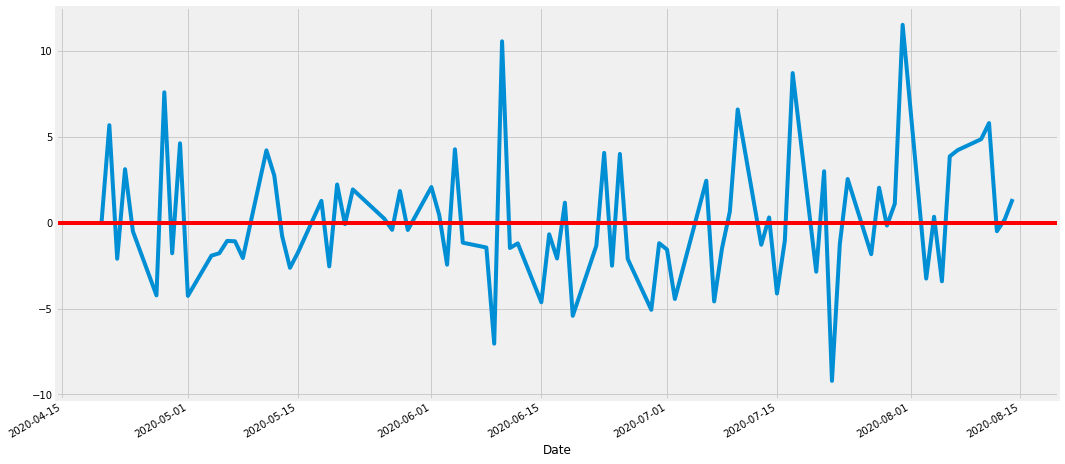

In [37]:
#finding profit

df['Adj_Close1'] = df['Adj Close'].shift(-1)

#profit by buying
df['profit_by_buying'] = [df.loc[ei, 'Adj_Close1'] - df.loc[ei, 'Adj Close'] if df.loc[ei, 'buy']==1 else 0 for ei in df.index]

#profit by selling
df['profit_by_selling'] = [df.loc[ei, 'Adj Close'] - df.loc[ei, 'Adj_Close1'] if df.loc[ei, 'sell']==1 else 0 for ei in df.index]
df['Profit'] = df['profit_by_buying'] + df['profit_by_selling']

#plotting profit 
df['Profit'].plot(figsize=(16,8))
plt.axhline(y=0, color='red')

In [38]:
#wealth
df['wealth'] = df['Profit'].cumsum()

Text(0.5, 1.0, 'Total money at end is 33.836700439453125')

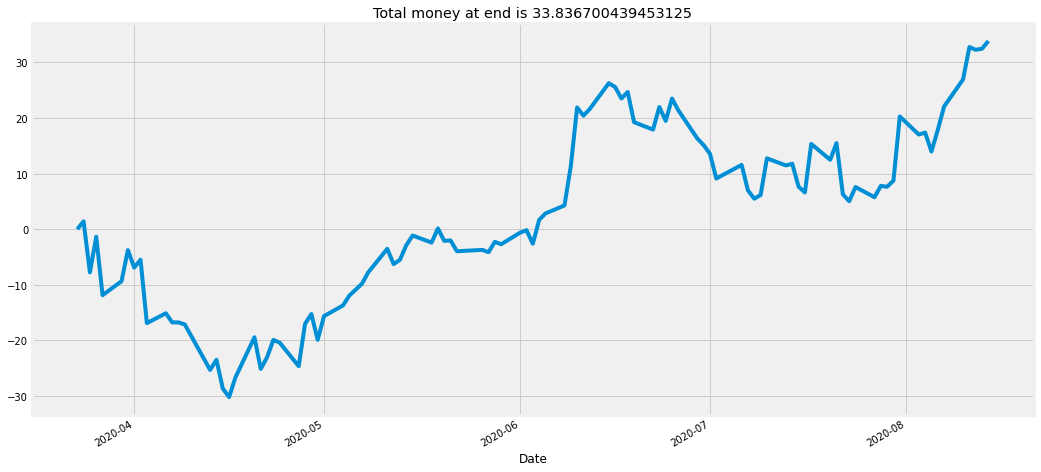

In [25]:
df['wealth'].plot(figsize=(16,8))
plt.title('Total money at end is {}'.format(df.loc[df.index[-2], 'wealth']))

In [39]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,buy,sell,Adj_Close1,profit_by_buying,profit_by_selling,Profit,wealth
Date,,,,,,,,,,,,,,,
2020-04-20,178.750000,174.990005,176.630005,175.059998,36669600.0,174.573792,0.000000,0.000000,0,0,167.353912,0.000000,0.0,0.000000,0.000000
2020-04-21,173.669998,166.110001,173.500000,167.820007,56203700.0,167.353912,-0.577549,-0.115510,1,0,173.038086,5.684174,0.0,5.684174,5.684174
2020-04-22,174.000000,170.820007,171.389999,173.520004,34651600.0,173.038086,-0.568762,-0.206160,1,0,170.943909,-2.094177,0.0,-2.094177,3.589996
2020-04-23,175.059998,170.910004,174.110001,171.419998,32790800.0,170.943909,-0.722919,-0.309512,1,0,174.065216,3.121307,0.0,3.121307,6.711304
2020-04-24,174.559998,170.710007,172.059998,174.550003,34305300.0,174.065216,-0.585771,-0.364764,1,0,173.566605,-0.498611,0.0,-0.498611,6.212692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,207.649994,203.139999,207.160004,203.380005,36446500.0,203.380005,2.039199,2.584142,1,0,209.190002,5.809998,0.0,5.809998,10.710480
2020-08-12,210.279999,204.750000,205.289993,209.190002,28041400.0,209.190002,1.914526,2.450219,1,0,208.699997,-0.490005,0.0,-0.490005,10.220474
2020-08-13,211.350006,208.149994,209.440002,208.699997,22588900.0,208.699997,1.755942,2.311363,1,0,208.899994,0.199997,0.0,0.199997,10.420471


In [40]:
#calculating CAGR,volatility,sharpe,max_dd to check performance of trading strategy

def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    n = len(df)/252
    CAGR = (df["cum_return"][-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    vol = df["daily_ret"].std() * np.sqrt(252)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [41]:
a=CAGR(df)
print(a)
b=volatility(df)
print(b)
c=sharpe(df,0)
print(c)
d=max_dd(df)
print(d)

0.7476592686396673
0.30620608743423594
2.441686495864464
0.06077393927841717
